<a href="https://colab.research.google.com/github/inddivyansh/GenAI_GfG/blob/main/HelloAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello AI First Model

In [252]:
# pip install tensorflow

In [253]:
from tensorflow.keras.datasets import mnist

In [254]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [255]:
x_train=x_train/255
x_test=x_test/255

In [256]:
y_train = to_categorical(y_train, num_classes= 10)

In [257]:
y_test = to_categorical(y_test, num_classes= 10)

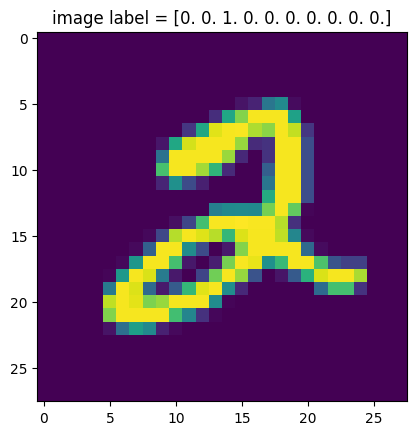

In [258]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title(f"image label = {y_train[5]}")
plt.show()

In [259]:
import numpy as np
np.unique(y_train)

array([0., 1.])

In [260]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [261]:
model = Sequential([
      Input(shape=(28,28)),
      Flatten(), # input layer neuron 784
      Dense(5, activation= 'relu'), #hidden layer 5 neuron relu activation fucntion
      Dense(10, activation='softmax') #output layer
])

In [262]:
model.summary()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [263]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [264]:
model.fit(x_train, y_train, epochs=5,batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 4s - 2ms/step - accuracy: 0.7301 - loss: 0.9052
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8519 - loss: 0.5247
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8686 - loss: 0.4748
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8751 - loss: 0.4520
Epoch 5/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8798 - loss: 0.4363


In [265]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8666 - loss: 0.4683


[0.4191063344478607, 0.882099986076355]

In [266]:
model.save('my_model.keras')

In [267]:
model.get_weights()

[array([[ 0.06455261, -0.03089431,  0.0136207 ,  0.0243687 , -0.03252997],
        [ 0.07654387,  0.01042049,  0.01642536,  0.05439377, -0.05744582],
        [ 0.01873703, -0.05502659,  0.02781022,  0.06363989, -0.07030912],
        ...,
        [-0.05481125,  0.05798027,  0.07493711,  0.07212938,  0.07777756],
        [-0.01114194, -0.05423715, -0.01809991, -0.04920269, -0.03317495],
        [ 0.01311936,  0.07118014, -0.04592446, -0.07333821, -0.02483747]],
       dtype=float32),
 array([0.20302615, 0.35766274, 0.01734363, 0.49633217, 0.22258517],
       dtype=float32),
 array([[-0.5663654 ,  0.6672114 ,  0.01347039,  0.53545225, -1.2274109 ,
          0.46754792, -0.65443766, -0.82581973,  0.27355796, -1.008977  ],
        [ 0.49652117, -1.8313658 , -0.04062137, -1.0308429 ,  0.33731177,
          0.20883021, -1.2125993 ,  0.04257478,  0.180212  , -0.87672836],
        [-0.7899749 , -0.04086749,  1.006156  , -0.16595788,  0.30235854,
         -1.1763911 , -0.8417102 ,  0.6855291 ,  

# **Complex Neural Network**

In [283]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense, concatenate

In [284]:
input_layer = Input(shape=(28,28))
flatten=Flatten()(input_layer)
hidden1 = Dense(128, activation='relu')(flatten)
hidden2 = Dense(160, activation='relu')(flatten)
hidden11 = Dense(64, activation='relu')(hidden1)
merge = concatenate([hidden11, hidden2])
output_layer = Dense(10, activation='softmax')(merge)

In [285]:
model = Model(inputs=input_layer, outputs=output_layer)

In [286]:
model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28      │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_26          │ (None, 784)       │          0 │ input_layer_28[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_83 (Dense)    │ (None, 128)       │    100,480 │ flatten_26[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_85 (Dense)    │ (None, 64)        │      8,256 │ dense_83[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_84 (Dense)    │ (None, 160)       │    125,600 │ flatten_26[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 224)       │          0 │ dense_85[0][0],   │
│ (Concatenate)       │                   │            │ dense_84[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_86 (Dense)    │ (None, 10)        │      2,250 │ concatenate_9[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 236,586 (924.16 KB)

 Trainable params: 236,586 (924.16 KB)

 Non-trainable params: 0 (0.00 B)

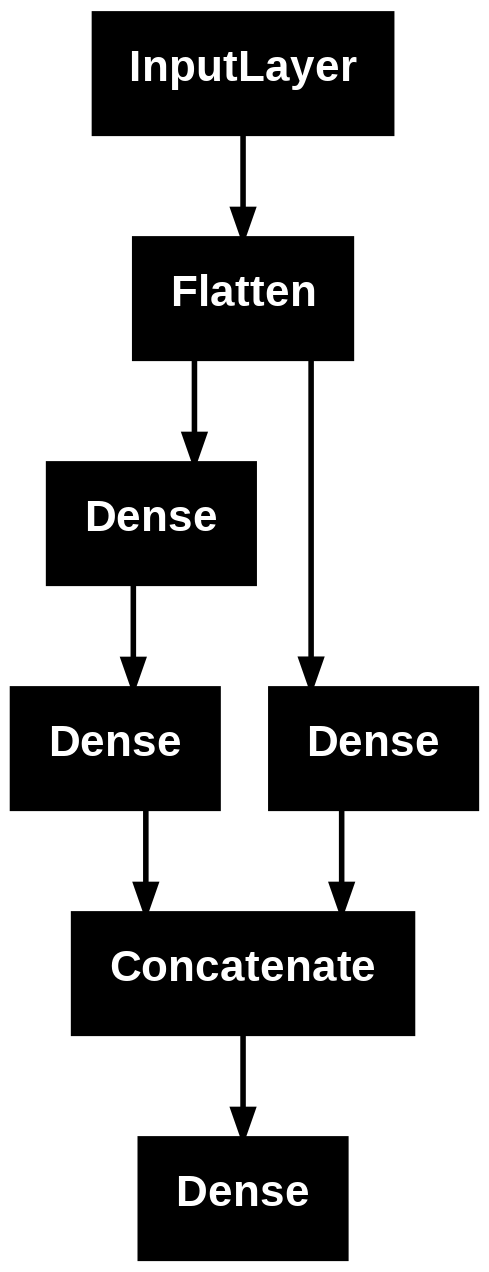

In [287]:
from keras.utils import plot_model

plot_model(model)

In [288]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [289]:
model.fit(x_train, y_train, epochs=5,batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 11s - 6ms/step - accuracy: 0.9384 - loss: 0.2104
Epoch 2/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9743 - loss: 0.0838
Epoch 3/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9822 - loss: 0.0554
Epoch 4/5
1875/1875 - 11s - 6ms/step - accuracy: 0.9861 - loss: 0.0426
Epoch 5/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9898 - loss: 0.0306


In [290]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0816


[0.06816386431455612, 0.9799000024795532]

In [294]:
model.save('my_model.keras')

In [293]:
model.weights

[<Variable path=dense_83/kernel, shape=(784, 128), dtype=float32, value=[[ 0.05038453  0.05039909  0.04312739 ...  0.04862268 -0.06154847
   -0.05586566]
  [-0.06257669  0.00550776 -0.06666753 ...  0.04571133  0.02010841
    0.04647314]
  [ 0.06235341  0.00722935  0.059355   ...  0.03530764 -0.06834107
   -0.00378064]
  ...
  [ 0.01153367 -0.03402069 -0.01819046 ...  0.05158696 -0.01954387
   -0.03185778]
  [-0.05497993  0.04103984 -0.06634203 ...  0.07568338 -0.04020784
    0.06264327]
  [ 0.00489195  0.04494176  0.07577933 ...  0.06961083 -0.06423762
   -0.04368652]]>,
 <Variable path=dense_83/bias, shape=(128,), dtype=float32, value=[-0.06895003  0.06173591  0.00632999  0.05350519 -0.00692617 -0.02295831
   0.04013384 -0.04188935  0.03645942  0.035522   -0.00722414  0.01331038
   0.09648366 -0.03864402  0.02258269  0.03354201  0.10133371 -0.00293251
   0.01891249 -0.03252614  0.02874864 -0.01660677 -0.00908926  0.08554008
  -0.00089321  0.02672356 -0.02305946  0.04364828 -0.01402971